# Import nescessary tools or library 

The First thing we need is the tools or libraries for this work 

which we will import it in the cell down below


In [1]:
pip install matplotlib==3.1.3

In [2]:
#These libraries imported for do the reading data and analysis process
import pandas as pd
import numpy as np

#These libraries imported for do the visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#These libraries imported for do the Machine Learning process
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import Dataset

In this section, we'll import dataset into this notebook and check if the dataset in this workspace is existed.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/world-happiness-report-2021.csv")
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Check missing and other things

In this section, we'll check if there's something wrong in the dataset

In [4]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [5]:
df.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [6]:
df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [7]:
df.shape

(149, 20)

**This dataset has 149 rows and 20 columns**

In the cell down below, we'll build another column named 'ID' for ease of visualization later

In [8]:
id_list = [index_ for index_ in range(0,149)]

id_df = pd.DataFrame({'ID' : id_list})
id_df.head(3)

,ID
0,0
1,1
2,2


In [9]:
df['ID'] = id_df

In [10]:
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,ID
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,1
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,3
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,4


# Set all question we would like to ask from the dataset

In this section, we will set all question we want to know from our dataset and investigate in the dataset to find the answer for each question.


1.   Which are the best top 5 countries for having good Freedom to make life choices ? 
2.   Which are the best top 7 countries for having good Social support ?
3.   What are the most influential features of the dataset to calculate the ladder score ?






# Begin to solve all the question we just set.


# **1.Which are the best top 5 countries for having good Freedom to make life choices ?**


In [11]:
#def make_an_ID(df) :
df.iloc[0]

Country name                                         Finland
Regional indicator                            Western Europe
Ladder score                                           7.842
Standard error of ladder score                         0.032
upperwhisker                                           7.904
lowerwhisker                                            7.78
Logged GDP per capita                                 10.775
Social support                                         0.954
Healthy life expectancy                                   72
Freedom to make life choices                           0.949
Generosity                                            -0.098
Perceptions of corruption                              0.186
Ladder score in Dystopia                                2.43
Explained by: Log GDP per capita                       1.446
Explained by: Social support                           1.106
Explained by: Healthy life expectancy                  0.741
Explained by: Freedom to

In [12]:
df_country = df['Country name']
freedom_lifechoice_df = df['Freedom to make life choices']

df_countryXfreedom_lifechoice = pd.DataFrame({'Country name' : df_country, 'Freedom to make life choices': freedom_lifechoice_df})
df_countryXfreedom_lifechoice = df_countryXfreedom_lifechoice.sort_values(by = 'Freedom to make life choices',ascending=False)

df_countryXfreedom_lifechoice.head(5)

,Country name,Freedom to make life choices
41,Uzbekistan,0.970
5,Norway,0.960
113,Cambodia,0.959
3,Iceland,0.955
0,Finland,0.949


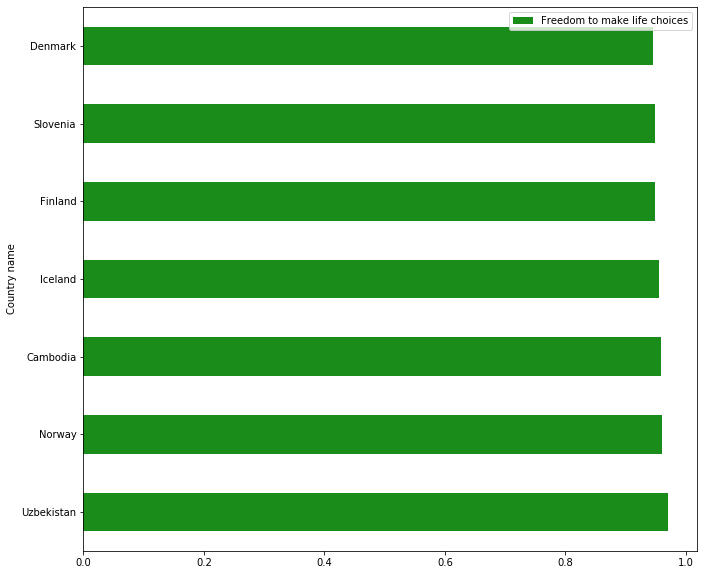

In [13]:
fig, ax = plt.subplots(figsize=(11,10))
g = df_countryXfreedom_lifechoice[:7].plot.barh(x='Country name', y='Freedom to make life choices',color = 'green', alpha = 0.9,ax=ax)
sns.set_theme('talk')


 In conclusion : The ladder score isn't depend on the Dystopia score


# **2.Which are the best top 7 countries for having good Social support ?**

In [14]:
df_country = df['Country name']
df_socialsupport = df['Social support']

df_countryXsocialsupp = pd.DataFrame({'Country name' : df_country, 'Social support': df_socialsupport})
df_countryXsocialsupp = df_countryXsocialsupp.sort_values(by = 'Social support',ascending=False)

df_countryXsocialsupp.head(7)

,Country name,Social support
3,Iceland,0.983
96,Turkmenistan,0.983
0,Finland,0.954
5,Norway,0.954
1,Denmark,0.954
44,Kazakhstan,0.952
28,Slovenia,0.948


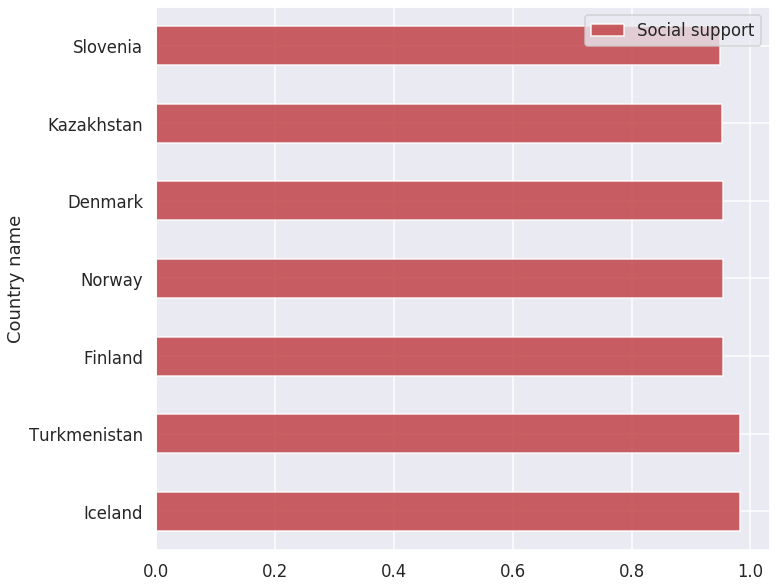

In [15]:
fig, ax = plt.subplots(figsize=(11,10))
g = df_countryXsocialsupp[:7].plot.barh(x='Country name', y='Social support',color = 'r', alpha = 0.9, ax=ax)
sns.set_theme('talk')

# **3.What are the most influential features of the dataset to calculate the ladder score ?**

Do/Make ML section 

In [16]:
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,ID
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,1
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,3
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,4


In [17]:
df_new = df
df_new = df_new.drop(labels='Country name',axis=1)
df_new = df_new.drop(labels='Regional indicator',axis=1)

X = df_new.drop(df[['Ladder score']],axis=1)
y = df_new['Ladder score']

In [18]:
X.head(5)

,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,ID
0,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0
1,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,1
2,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2
3,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,3
4,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,4


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.75,random_state = 42)

In [20]:
X_train.head(5)

,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,ID
114,0.103,4.997,4.592,7.158,0.744,54.706,0.882,0.061,0.684,2.43,0.183,0.634,0.196,0.608,0.228,0.163,2.783,114
46,0.066,6.235,5.977,10.817,0.843,66.900,0.867,-0.104,0.736,2.43,1.461,0.857,0.580,0.591,0.120,0.130,2.368,46
115,0.052,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736,115
61,0.042,5.928,5.763,10.651,0.799,73.900,0.672,-0.083,0.727,2.43,1.403,0.758,0.801,0.353,0.134,0.135,2.262,61
146,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095,146


In [21]:
#Applying the linear regression, fitting the model, making predictions with the test set and scoring the success of the model
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train,y_train)
y_test_preds = lm_model.predict(X_test)
test_score = r2_score(y_test, y_test_preds)
print(test_score)

0.999999775538826


In [22]:
#Code from Udacity notebook[Coefficient of model calculation].
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

In [23]:
coef_df

,est_int,coefs,abs_coefs
9,Ladder score in Dystopia,-2.009956,2.009956
10,Explained by: Log GDP per capita,0.459825,0.459825
2,lowerwhisker,0.368533,0.368533
7,Generosity,0.340838,0.340838
4,Social support,0.335312,0.335312
8,Perceptions of corruption,-0.328817,0.328817
16,Dystopia + residual,0.322673,0.322673
1,upperwhisker,0.308258,0.308258
14,Explained by: Generosity,-0.198947,0.198947
15,Explained by: Perceptions of corruption,-0.192176,0.192176
